<center> <img src=titanic.jpg width=800px height=30%>

# <center> Титаник - Машинное обучение после катастрофы 

## Исследование данных

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
X_train=pd.read_csv('/kaggle/input/titanic/train.csv').drop(['Survived'],axis=1)

y_train=pd.read_csv('/kaggle/input/titanic/train.csv')['Survived']

X_test=pd.read_csv('/kaggle/input/titanic/test.csv')

y_test=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')['Survived']

In [2]:
# загрузка данных
data=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [3]:
# Датасет 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Выявление пропусков в процентом соотношении
np.round(data.isnull().sum()/data.shape[0],3)

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age            0.199
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin          0.771
Embarked       0.002
dtype: float64

In [5]:
np.round(X_test.isnull().sum()/X_test.shape[0],3)

PassengerId    0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age            0.206
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.002
Cabin          0.782
Embarked       0.000
dtype: float64

In [6]:
# Наличие дубликатов
data.duplicated().sum()

np.int64(0)

In [7]:
X_test.duplicated().sum()

np.int64(0)

In [9]:
# Получение столбцов с количеством уникальных значений и типом данных
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col,data[col].nunique(),data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Survived,2,int64
1,Sex,2,object
2,Pclass,3,int64
3,Embarked,3,object
4,SibSp,7,int64
5,Parch,7,int64
6,Age,88,float64
7,Cabin,147,object
8,Fare,248,float64
9,Ticket,681,object


In [11]:
# Статистические данные
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


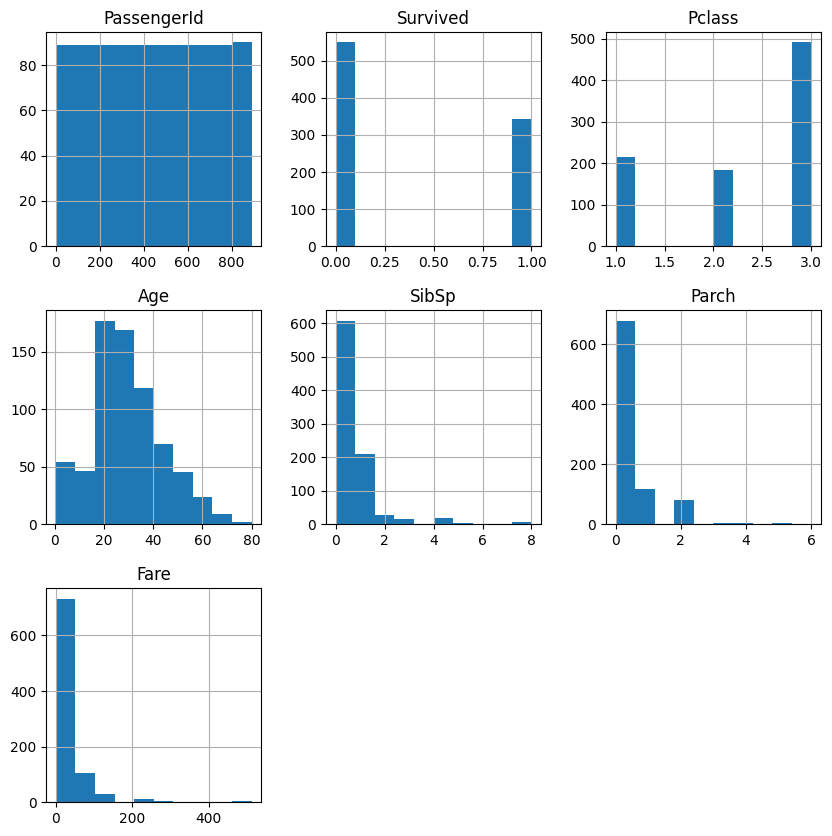

In [12]:
# Рисуем гистограмму всех числовых данных
data.hist(figsize=(10,10));

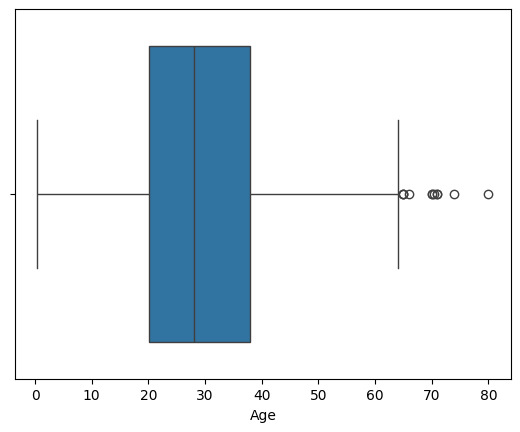

In [13]:
# Коробчатая диаграмма неприрывного признака Age
sns.boxplot(data['Age'],orient='h');

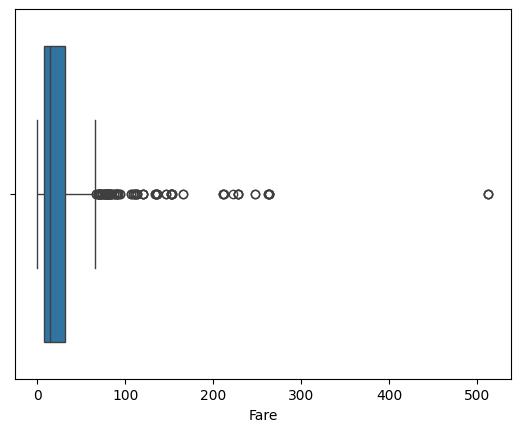

In [14]:
# Коробчатая диаграмма неприрывного признака Fare
sns.boxplot(data['Fare'],orient='h');

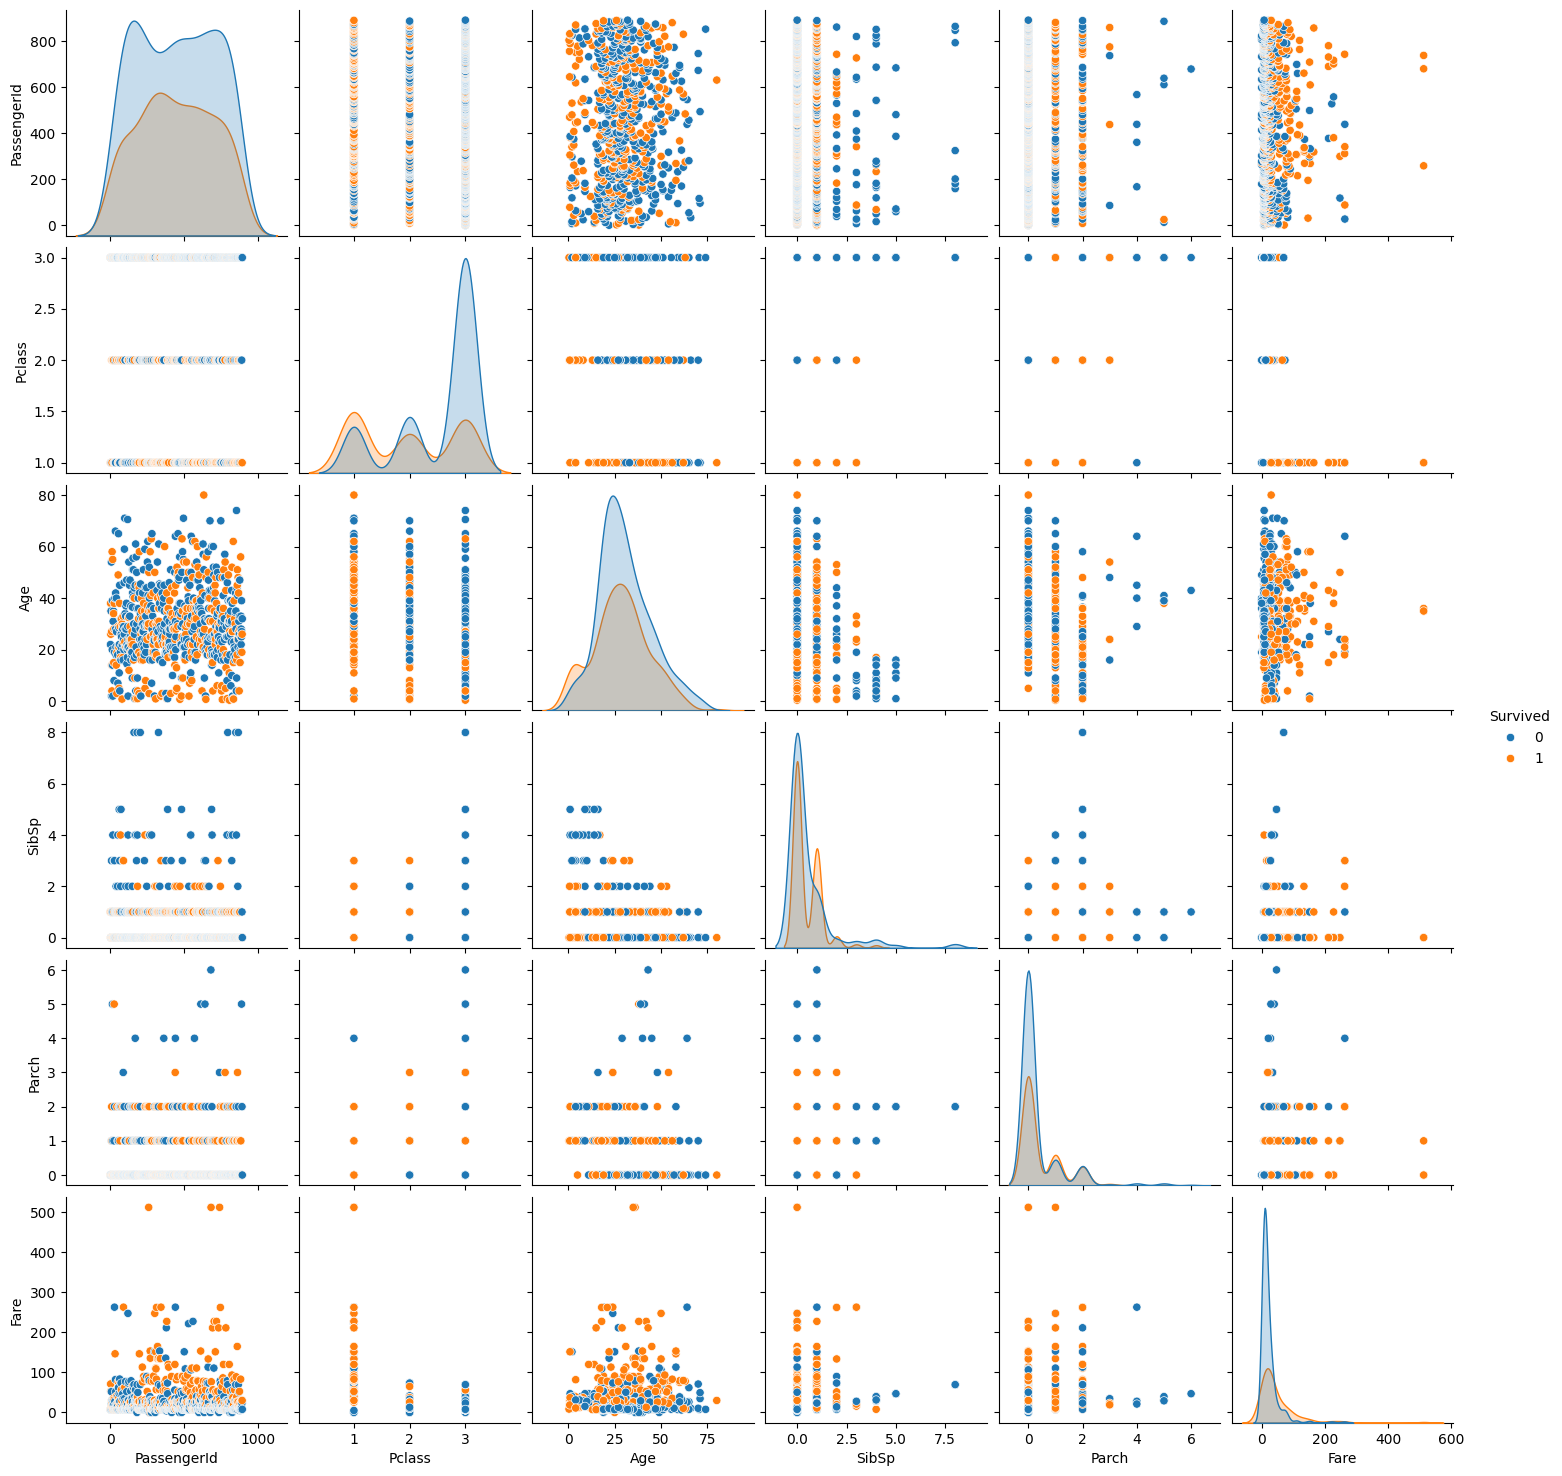

In [15]:
# диаграммы рассеивания в зависимости от целевого признака
sns.pairplot(data,hue='Survived');

## Отбор признаков

In [25]:

# Удаление столбцов, где процент уникальных значений высок 
data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
X_test.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)


### Обработка пропусков

In [16]:
data.groupby(['Pclass','Sex','Embarked'])['Fare'].median()

Pclass  Sex     Embarked
1       female  C           83.1583
                Q           90.0000
                S           79.6500
        male    C           61.6792
                Q           90.0000
                S           35.0000
2       female  C           24.0000
                Q           12.3500
                S           23.0000
        male    C           25.8604
                Q           12.3500
                S           13.0000
3       female  C           14.4583
                Q            7.7500
                S           14.4500
        male    C            7.2292
                Q            7.7500
                S            8.0500
Name: Fare, dtype: float64

In [17]:
X_test.loc[X_test['Fare'].isnull(),'Fare']=8.05

In [18]:
# Замена пропусков в столбце Emarked
data.loc[data['Embarked'].isnull(),'Embarked']='C'


In [19]:
# Группировка по классу, полу и вывод медианных значений в возрасте для данной группировки
data.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [20]:
# Замена пропущенных значений в столбце Age
data.loc[((data['Pclass']==1)&(data['Sex']=='female')&(data['Age'].isnull())),'Age']=35
data.loc[((data['Pclass']==1)&(data['Sex']=='male')&(data['Age'].isnull())),'Age']=40
data.loc[((data['Pclass']==2)&(data['Sex']=='female')&(data['Age'].isnull())),'Age']=28
data.loc[((data['Pclass']==2)&(data['Sex']=='male')&(data['Age'].isnull())),'Age']=30
data.loc[((data['Pclass']==3)&(data['Sex']=='female')&(data['Age'].isnull())),'Age']=21
data.loc[((data['Pclass']==3)&(data['Sex']=='male')&(data['Age'].isnull())),'Age']=25

X_test.loc[((X_test['Pclass']==1)&(X_test['Sex']=='female')&(X_test['Age'].isnull())),'Age']=35
X_test.loc[((X_test['Pclass']==1)&(X_test['Sex']=='male')&(X_test['Age'].isnull())),'Age']=40
X_test.loc[((X_test['Pclass']==2)&(X_test['Sex']=='female')&(X_test['Age'].isnull())),'Age']=28
X_test.loc[((X_test['Pclass']==2)&(X_test['Sex']=='male')&(X_test['Age'].isnull())),'Age']=30
X_test.loc[((X_test['Pclass']==3)&(X_test['Sex']=='female')&(X_test['Age'].isnull())),'Age']=21
X_test.loc[((X_test['Pclass']==3)&(X_test['Sex']=='male')&(X_test['Age'].isnull())),'Age']=25

In [21]:
data['Age']=pd.cut(data['Age'],bins=[0,1,5,10,20,30,40,50,60,70,80,100],labels=[1,2,3,4,5,6,7,8,9,10,11],right=False)
X_test['Age']=pd.cut(data['Age'],bins=[0,1,5,10,20,30,40,50,60,70,80,100],labels=[1,2,3,4,5,6,7,8,9,10,11],right=False)

In [22]:
data['Sex']=data['Sex'].apply(lambda x: 1 if x=='female' else 0).astype('int')
X_test['Sex']=X_test['Sex'].apply(lambda x: 1 if x=='female' else 0).astype('int')

In [23]:
encoder=preprocessing.LabelEncoder()
encoder.fit(data['Embarked'])
data['Embarked']=encoder.transform(data['Embarked'])
X_test['Embarked']=encoder.transform(X_test['Embarked'])

In [26]:
data.corr()['Survived'].abs().sort_values().drop(['Survived'],axis=0)

SibSp       0.035322
Age         0.074256
Parch       0.081629
Embarked    0.174199
Fare        0.257307
Pclass      0.338481
Sex         0.543351
Name: Survived, dtype: float64

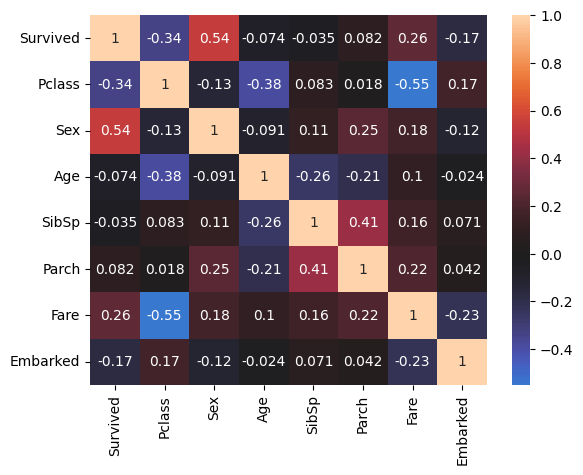

In [27]:
sns.heatmap(data.corr(),center=0,annot=True);

Survived
0    549
1    342
Name: count, dtype: int64


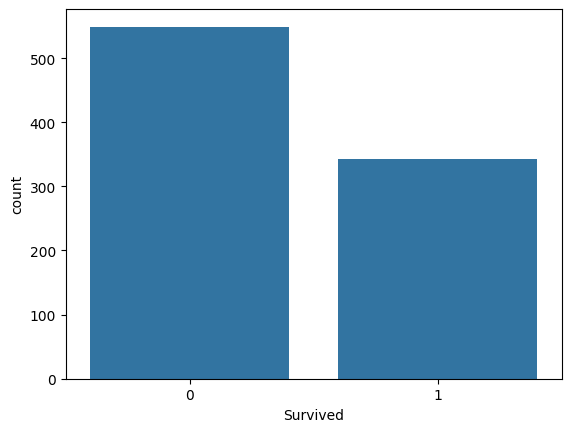

In [28]:
print(data['Survived'].value_counts())
sns.countplot(data,x='Survived');

In [29]:
X=data.drop(['Survived'],axis=1)
y=data['Survived']

X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
from sklearn import linear_model,metrics

basemodel=linear_model.LogisticRegression(random_state=42,max_iter=400)
basemodel.fit(X_train,y_train)
predict_y=basemodel.predict(X_train)
predict_y_valid=basemodel.predict(X_valid)

print(metrics.classification_report(y_train,predict_y))
print(metrics.classification_report(y_valid,predict_y_valid))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.72      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.80       712
weighted avg       0.81      0.81      0.81       712

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.70      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



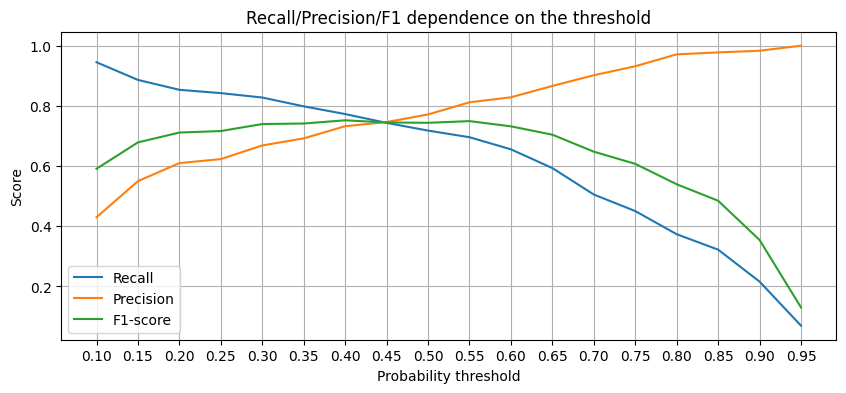

In [31]:
y_proba_pred = basemodel.predict_proba(X_train)[:, 1]
y_proba_pred = pd.Series(y_proba_pred)
recall_scores = []
precision_scores = []
f1_scores = []
thresholds = np.arange(0.1, 1, 0.05)
for threshold in thresholds:
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    recall_scores.append(metrics.recall_score(y_train, y_pred))
    precision_scores.append(metrics.precision_score(y_train, y_pred))
    f1_scores.append(metrics.f1_score(y_train, y_pred))
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
ax.plot(thresholds, recall_scores, label='Recall')
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds) 
ax.grid()
ax.legend();

In [32]:
threshold_opt = 0.4
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_train, y_pred_opt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       439
           1       0.73      0.77      0.75       273

    accuracy                           0.80       712
   macro avg       0.79      0.80      0.80       712
weighted avg       0.81      0.80      0.81       712



In [33]:
y_proba_valid=basemodel.predict_proba(X_valid)[:, 1]
y_proba_valid=pd.Series(y_proba_valid)
y_valid_opt = y_proba_valid.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y_valid, y_valid_opt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [34]:
import optuna

/home/roman/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
from sklearn import ensemble
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))
  return score 

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

# выводим результаты на обучающей выборке
print(study.best_params) 
print(study.best_value) 



[I 2025-01-30 17:24:02,664] A new study created in memory with name: RandomForestClassifier
/tmp/ipykernel_14686/2648403915.py:4: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
/tmp/ipykernel_14686/2648403915.py:5: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
/tmp/ipykernel_14686/2648403915.py:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
[I 2025-01-30 17:24:03,134] Trial 0 finished with value: 0.8284023668639053 and parameters: {'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8284023668639053.
/tmp/ipykernel_14686/2648403915.p

{'n_estimators': 116, 'max_depth': 28, 'min_samples_leaf': 2}
0.8682170542635659


In [36]:
from sklearn import ensemble

ensemble_model=ensemble.RandomForestClassifier(random_state=42,max_depth=12,min_samples_leaf=6,n_estimators=103)

ensemble_model.fit(X_train,y_train)

predict_y=ensemble_model.predict(X_train)
predict_y_valid=ensemble_model.predict(X_valid)

print(metrics.classification_report(y_train,predict_y))
print(metrics.classification_report(y_valid,predict_y_valid))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       439
           1       0.89      0.74      0.81       273

    accuracy                           0.87       712
   macro avg       0.87      0.84      0.85       712
weighted avg       0.87      0.87      0.86       712

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.84      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [120]:
from sklearn.ensemble import GradientBoostingClassifier

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=7, #максимальная глубина дерева
    n_estimators=100, #количество деревьев в ансамбле
    min_samples_leaf=3,
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
predict_y=gb.predict(X_train)
predict_y_valid=gb.predict(X_valid)


print(metrics.classification_report(y_valid,predict_y_valid))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [121]:
print(metrics.classification_report(y_train,predict_y))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       439
           1       0.95      0.92      0.93       273

    accuracy                           0.95       712
   macro avg       0.95      0.94      0.95       712
weighted avg       0.95      0.95      0.95       712



In [125]:
from sklearn.ensemble import StackingClassifier
from sklearn import tree
estimators = [
    ('lr', linear_model.LogisticRegression()),
    ('dt',  tree.DecisionTreeClassifier(random_state=42,max_depth=6,min_samples_leaf=4))
]
reg = StackingClassifier(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=ensemble.RandomForestClassifier( #метамодель
        n_estimators=100, #количество деревьев в ансамбле                    
        random_state=42 #датчик генератора случайных чисел
    )
)
reg.fit(X_train,y_train)
predict_y=reg.predict(X_train)
predict_y_valid=reg.predict(X_valid)


print(metrics.classification_report(y_valid,predict_y_valid))
print(metrics.classification_report(y_train,predict_y))

/home/roman/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.61      0.68        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       439
           1       0.81      0.71      0.76       273

    accuracy                           0.82       712
   macro avg       0.82      0.80      0.81       712
weighted avg       0.82      0.82      0.82       712



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures()